# TP2: Linear regression

In [2]:
# Import all libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.linear_model import LinearRegression #OLS
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from scipy.stats import t
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

In [3]:
# Change here using YOUR own first and last names
fn1 = "maxime"
ln1 = "lhoustau"
filename = "_".join(map(lambda s: s.strip().lower(),
                      ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

### Question 1

In [7]:
# Export the dataset from the .csv file and print the different variables
Location = r'./data_dm3.csv'
data_csv = pd.read_csv(Location, header=None, sep=',')
data = data_csv.values;
nb_column = data.shape[1]-1
print("Number of exploratory variables: ", nb_column)
print("\nNumber of observations: ", data.size - 442 )
shape = data_csv.shape
p = shape[1]-1
n = shape[0]

Number of exploratory variables:  210

Number of observations:  92820


### Question 2

Data centered and normalized looking at their means and norms

Output variable Y
Norm:  21.023796041628643 , Mean:  1.3061447348531253e-17
So it is also centered and normalized


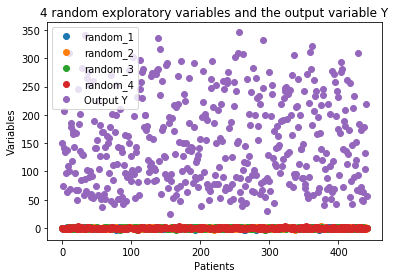

The magnitude of the output variable datas is much bigger than the others


In [38]:
#Computation of the sum and mean of each column
normm=[0]*210
means=[0]*210

for i in range(nb_column):
    normm[i] = np.linalg.norm(data_csv.T.values[i])
    means[i] = np.mean(data_csv.T.values[i])
    
print("Data centered and normalized looking at their means and norms");
print("\nOutput variable Y")
print("Norm: ", normm[209], ", Mean: ", means[209]);
print("So it is also centered and normalized");

#Plot of 4 random exploratory variables and the output variable
rd.seed(10)

plt.figure()
plt.plot(data_csv.T.values[rd.randint(0, nb_column)], 'o')
plt.plot(data_csv.T.values[rd.randint(0, nb_column)], 'o')
plt.plot(data_csv.T.values[rd.randint(0, nb_column)], 'o')
plt.plot(data_csv.T.values[rd.randint(0, nb_column)], 'o')
plt.plot(data_csv.T.values[nb_column], 'o')
plt.title("4 random exploratory variables and the output variable Y")
plt.ylabel("Variables")
plt.xlabel("Patients")
plt.legend(('random_1','random_2', 'random_3', 'random_4', 'Output Y'))
plt.show()

print("The magnitude of the output variable datas is much bigger than the others")

### Question 3

In [39]:
#Extraction of datas to create 2 samples: test and train
index_test = rd.sample(range(n), n//5)
index_train = np.setdiff1d(range(n), index_test)


X_test = data_csv.values[index_test]
Y_test = X_test[:,p]
X_test = X_test[:,:p]
X_train = data_csv.values[index_train]
Y_train = X_train[:,p]
X_train = X_train[:,:p]

### Question 4

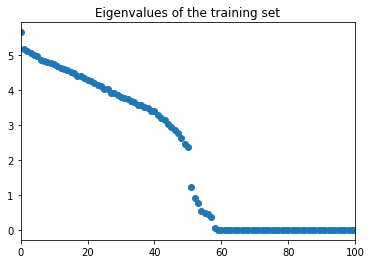

The PCA variables enables to reduce the number of variables. We can see here that it makes sense since the weight is very strong on very few variables (60)
We can reduce the space to these 60 variables


In [40]:
#Covariance matrix of X_train and its eigenvalues
Cov_train = np.cov(X_train.T)
eig_train = np.sort(np.real(np.linalg.eig(Cov_train)[0]))[::-1] #eigenvalues
plt.figure()
plt.plot(eig_train, 'o')
plt.title("Eigenvalues of the training set")
plt.xlim(0, 100)
plt.show()

print("The PCA variables enables to reduce the number of variables. We can see here that it makes sense since the weight is very strong on very few variables (60)")
print("We can reduce the space to these 60 variables")

### Question 5

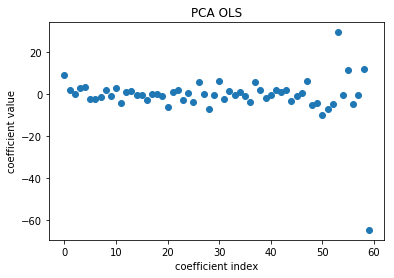

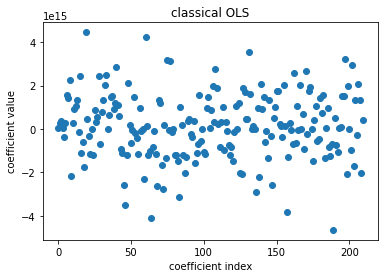

In [41]:
sorted_eigvalues_indices = np.argsort(np.real(np.linalg.eig(Cov_train)[0]))[::-1]
V = np.real(np.linalg.eig(Cov_train)[1][:, sorted_eigvalues_indices[:60]])

#PCA OLS
PCA_OLS = LinearRegression().fit(np.dot(X_train, V),Y_train) 
plt.figure()
plt.plot(PCA_OLS.coef_, 'o')
plt.title("PCA OLS")
plt.ylabel("coefficient value")
plt.xlabel("coefficient index")
plt.show()

#Classical OLS
classical_OLS = LinearRegression().fit(X_train,Y_train)
plt.figure()
plt.plot(classical_OLS.coef_, 'o')
plt.title("classical OLS")
plt.ylabel("coefficient value")
plt.xlabel("coefficient index")
plt.show()

### Question 6

In [47]:
print("PCA OLS intercept: ", PCA_OLS.intercept_)
print("classical OLS intercept: ", classical_OLS.intercept_)
print("mean value of Y_{train}: ", np.mean(Y_train))

print("\nThose means are almost equal. The intercept is the value of Y when X=0 so it doesn't depend on the coefficients.")
print("As X is centered, X_train is quite certainly centered as well so mean(Y_train)=mean(f(X_train))=f(mean(X_train)) = f(0)= intercept  ")

#normalize X_train
PCA_means = [np.mean(X_train.T[i]) for i in range(p)]
PCA_norms = [np.linalg.norm(X_train.T[i], ord=2) for i in range(p)]
X_train_centered_normalized = (X_train - np.mean(PCA_means))/np.mean(PCA_norms) * np.mean(normm)

#Linear regression
normalized_PCA_OLS = LinearRegression().fit(np.dot(X_train_centered_normalized, V),Y_train)

print("\nnormalized PCA OLS intercept: ", normalized_PCA_OLS.intercept_)
print("classical OLS intercept: ", classical_OLS.intercept_)
print("mean value of Y_{train}: ", np.mean(Y_train))

PCA OLS intercept:  152.83335691302977
classical OLS intercept:  151.92266949152543
mean value of Y_{train}:  150.61016949152543

Those means are almost equal. The intercept is the value of Y when X=0 so it doesn't depend on the coefficients.
As X is centered, X_train is quite certainly centered as well so mean(Y_train)=mean(f(X_train))=f(mean(X_train)) = f(0)= intercept  

normalized PCA OLS intercept:  152.80862106805165
classical OLS intercept:  151.92266949152543
mean value of Y_{train}:  150.61016949152543


### Question 7

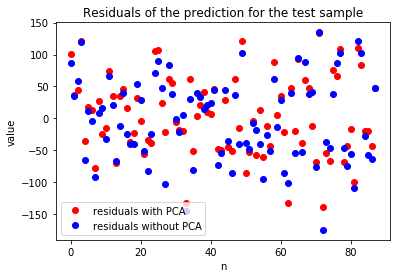

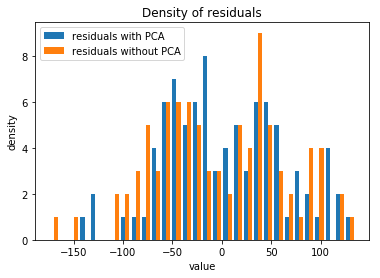

with PCA: R^2 =  0.45565664268009975
without PCA: R^2 =  0.376236442212603
with PCA: R_pred =  3723.0177649372768
without PCA: R_pred =  4266.20950827218


In [53]:
#Residuals
PCA_eps = PCA_OLS.predict(np.dot(X_test,V)) - Y_test
classical_eps = classical_OLS.predict(X_test) - Y_test
plt.figure()
plt.plot(PCA_eps, 'ro')
plt.plot(classical_eps, 'bo')
plt.legend(("residuals with PCA", "residuals without PCA"))
plt.title("Residuals of the prediction for the test sample")
plt.xlabel("n")
plt.ylabel("value")
plt.show()

#Histogramm
plt.figure()
plt.hist([PCA_eps, classical_eps], 30)
plt.legend(("residuals with PCA", "residuals without PCA"))
plt.title("Density of residuals")
plt.ylabel("density")
plt.xlabel("value")
plt.show()

#Determination coefficient
print("with PCA: R^2 = ", PCA_OLS.score(np.dot(X_test,V),Y_test))
print("without PCA: R^2 = ", classical_OLS.score(X_test,Y_test))

#Prediction risk
R_pred_PCA = np.mean(np.linalg.norm(Y_test - PCA_OLS.predict(np.dot(X_test,V)))**2) / (n//5)
R_pred_classical = np.mean(np.linalg.norm(Y_test - classical_OLS.predict(X_test))**2) / (n//5)
print("with PCA: R_pred = ",R_pred_PCA)
print("without PCA: R_pred = ",R_pred_classical)

### Question 8

In [55]:
X_aug = np.column_stack( (np.ones( (X_train.shape[0], 1 )), X_train )) 
p_tmp = X_aug.shape[1]
n_tmp = X_aug.shape[0]
test = np.zeros((p_tmp,p_tmp))
pval_mem = np.zeros(p_tmp)
pval = np.zeros((p_tmp,p_tmp))
resids = Y_train
var_sel = []
var_remain = list(range(p_tmp))
in_test = []
regr = LinearRegression()

for k in range(p_tmp): 
    resids_mem = np.zeros((p_tmp,n_tmp))

    for i in var_remain:
        xtmp = X_aug [:,[i]]
        regr.fit(xtmp , resids)
        
        #calcul de (x'x)
        xx = np.sum( X_aug [:,[i]] ** 2 )
        resids_mem [i,:] = regr.predict(xtmp) - resids
        sigma2_tmp = np.sum (resids_mem [i,:] ** 2) / xx
        test[k,i] = np.sqrt(n) * np.abs(regr.coef_) / (np.sqrt( sigma2_tmp )) 
        pval[k,i] =   2 * (1 - norm.cdf(test[k,i]))

   #Séparation en 2 vecteurs
    best_var = np.argmax(test[k,:])
    var_sel.append(best_var)
    resids = resids_mem[best_var,:]
    pval_mem [k] = pval[k,best_var]
    var_remain = np.setdiff1d(var_remain,var_sel)
    
print("variables in order : ",var_sel)

AttributeError: 'list' object has no attribute 'cdf'

### Question 9

Résultat des 3 premiers tests statistiques


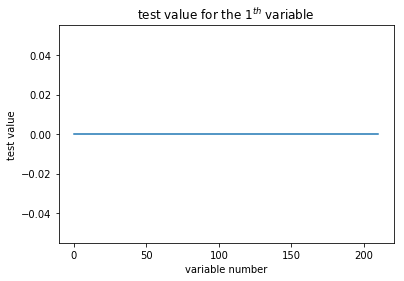

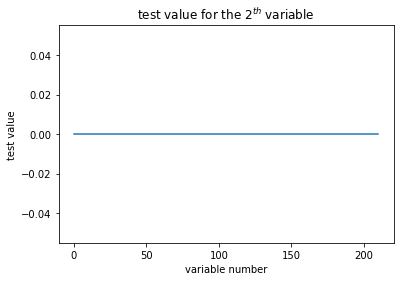

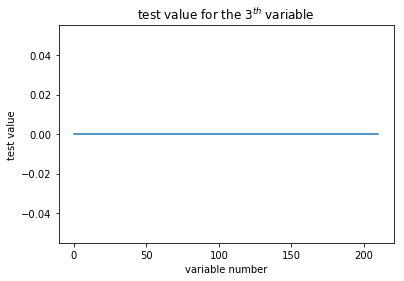

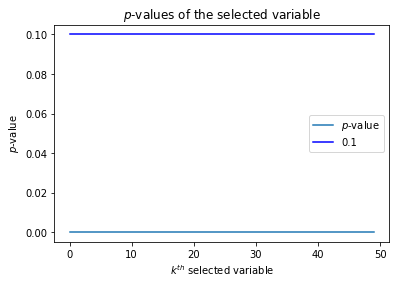

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 211

In [50]:
#Statistical tests
print("Résultat des 3 premiers tests statistiques")
for k in range(3) :
    plt.figure()
    plt.plot(test[k,:])
    plt.xlabel("variable number")
    plt.ylabel("test value")
    plt.title("test value for the $"+str(k+1)+"^{th}$ variable")
    plt.show()
    
#50 first p-values
plt.figure()
plt.plot(pval_mem[:50])
plt.plot(50*[0.1],'b')
plt.xlabel("$k^{th}$ selected variable")
plt.ylabel("$p$-value")
plt.title("$p$-values of the selected variable")
plt.legend(("$p$-value", "0.1"))
plt.show()

# selected variables
print("variables selected in order: ",np.array(var_sel)[pval_mem < 0.1])

### Question 10

In [51]:
#forward variable selection OLS
Forward_OLS = LinearRegression().fit(X_train[:,var_sel], Y_train)

#Comparaison
R_pred_forward = np.mean(np.linalg.norm(Y_test - Forward_OLS.predict(X_test[:,var_sel]))**2) / (n//5)

print("with PCA: R_pred = ",R_pred_PCA)
print("without PCA: R_pred = ",R_pred_classical)
print("with forward: R_pred = ",R_pred_forward)

ValueError: Found array with 0 feature(s) (shape=(354, 0)) while a minimum of 1 is required.

### Question 11

In [56]:
# index samples
indexes = np.arange(n)
rd.shuffle(indexes)
index_fold = 4*[0]
index_fold[0] = indexes[:n//4]
index_fold[1] = indexes[n//4:n//2]
index_fold[2] = indexes[n//2:3*n//4]
index_fold[3] = indexes[3*n//4:]

# samples
fold = 4*[0]
for i in range(4) :
    fold[i] = data.values[index_fold[i]]
    print("number of observations in fold ",i," : ", len(fold[i]))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

### Question 12

In [57]:
def Ridge_risk(lmbda):
    Risks = []
    for i in range(4) :
        # create the regression
        non_i = np.setdiff1d(range(4), i)
        train_fold_indexes = [index_fold[j][k] for j in non_i for k in range(len(index_fold[j]))]
        train_fold = data.values[train_fold_indexes]
        Y_train_fold = train_fold[:,p]
        X_train_fold = train_fold[:,:p]
        tmp_reg = Ridge(lmbda).fit(X_train_fold,Y_train_fold)
        # compute the risk
        R_pred = np.mean(np.linalg.norm(Y_train_fold - tmp_reg.predict(X_train_fold))**2) / (n//5)
        Risks.append(R_pred)
    return np.mean(Risks)
   
#Plot
params = np.linspace(0.1,100000,100)
plt.figure()
plt.plot(params,np.vectorize(Ridge_risk)(params))
plt.xlabel("ridge parmaeter lambda")
plt.ylabel("R_pred")
plt.title("R_pred en fonction de lambda")
#Zoom
params2 = np.linspace(0.01,1.,100)
plt.figure()
plt.plot(params2,np.vectorize(Ridge_risk)(params2))
plt.xlabel("ridge parmaeter lambda")
plt.ylabel("R_pred")
plt.title("R_pred en fonction de lambda (zoom)")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

<Figure size 432x288 with 0 Axes>